In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit, abs as abs_, col,  avg
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# No support for maps
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#import seaborn as sns

# Define crop files
data_folder = "csv_data"
crop_files = {
    "rice": os.path.join(data_folder, "rice.csv"),
    "maize": os.path.join(data_folder, "maize.csv"),
    "wheat": os.path.join(data_folder, "wheat.csv"),
    "soybean": os.path.join(data_folder, "soybean.csv")
}

In [2]:
# Analyzing crop yield correlation with distance from equator (abs(latitude))
spark = SparkSession.builder.appName("CropYieldLatitudeAnalysis").getOrCreate()

for crop, path in crop_files.items():
    print(f"\n🔍 Analyzing {crop.upper()} data")

    # Load data
    df = spark.read.option("header", True).option("inferSchema", True).csv(path)

    # Add crop name and absolute latitude
    df = df.withColumn("crop", lit(crop))
    df = df.withColumn("abs_latitude", abs_(col("lat")))

    # Check required columns
    required_cols = {"var", "abs_latitude", "year"}
    if not required_cols.issubset(set(df.columns)):
        print(f"⚠️ Skipping {crop} — missing one of {required_cols}")
        continue


    years = df.select("year").distinct().orderBy("year").rdd.flatMap(lambda x: x).collect()

    # Print correlations
    for year in years:
        year_df = df.filter(col("year") == year)
        corr = year_df.stat.corr("abs_latitude", "var")
        if corr is not None:
            print(f"Year {year}: Correlation (abs_latitude vs var) = {round(corr, 4)}")
        else:
            print(f"Year {year}: Not enough data for correlation")

# Stop Spark session
spark.stop()


🔍 Analyzing RICE data
Year 1981: Correlation (abs_latitude vs var) = 0.3508
Year 1982: Correlation (abs_latitude vs var) = 0.3463
Year 1983: Correlation (abs_latitude vs var) = 0.339
Year 1984: Correlation (abs_latitude vs var) = 0.3467
Year 1985: Correlation (abs_latitude vs var) = 0.3176
Year 1986: Correlation (abs_latitude vs var) = 0.3319
Year 1987: Correlation (abs_latitude vs var) = 0.3369
Year 1988: Correlation (abs_latitude vs var) = 0.3154
Year 1989: Correlation (abs_latitude vs var) = 0.351
Year 1990: Correlation (abs_latitude vs var) = 0.326
Year 1991: Correlation (abs_latitude vs var) = 0.367
Year 1992: Correlation (abs_latitude vs var) = 0.3474
Year 1993: Correlation (abs_latitude vs var) = 0.3612
Year 1994: Correlation (abs_latitude vs var) = 0.3278
Year 1995: Correlation (abs_latitude vs var) = 0.3322
Year 1996: Correlation (abs_latitude vs var) = 0.3336
Year 1997: Correlation (abs_latitude vs var) = 0.3005
Year 1998: Correlation (abs_latitude vs var) = 0.3367
Year 1999

Full file path: csv_data/crop_yield_average.csv

📈 Plotting average yield over years for RICE...
   Crop  Year  Area (ha)  Production (t)  Yield (t/ha)
0  Rice  2016  162337038     737424590.1      4.542553
1  Rice  2017  162802341     748898980.7      4.600050
2  Rice  2018  164235974     763880184.9      4.651114
3  Rice  2019  161019964     755487923.8      4.691890
4  Rice  2020  165134347     775114187.4      4.693840
5  Rice  2021  166935425     790822525.3      4.737296
6  Rice  2022  167517785     788933617.0      4.709551


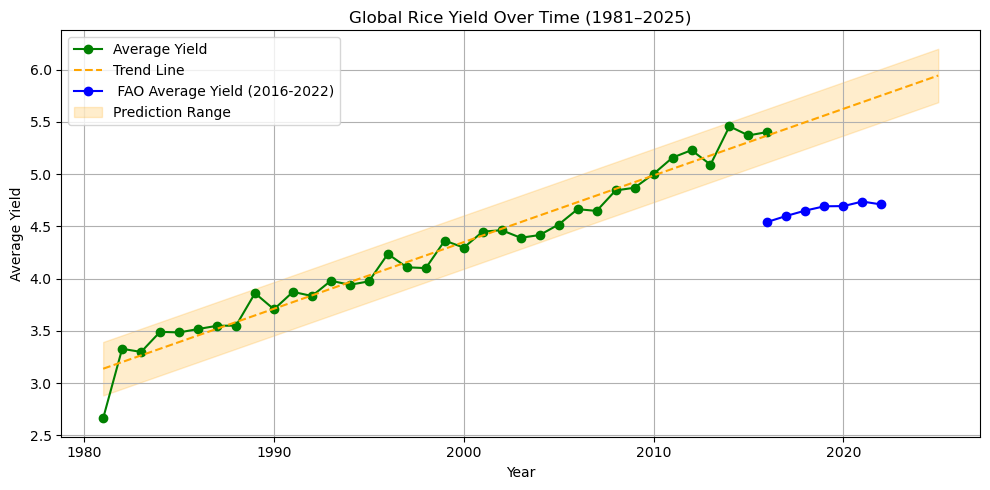


📈 Plotting average yield over years for MAIZE...
    Crop  Year  Area (ha)  Production (t)  Yield (t/ha)
0  Maize  2016  194291854    1.123549e+09      5.782790
1  Maize  2017  198243368    1.136477e+09      5.732739
2  Maize  2018  194417282    1.112841e+09      5.723984
3  Maize  2019  195640008    1.136920e+09      5.811288
4  Maize  2020  199561842    1.154922e+09      5.787287
5  Maize  2021  205288277    1.204689e+09      5.868282
6  Maize  2022  203364803    1.162118e+09      5.714450


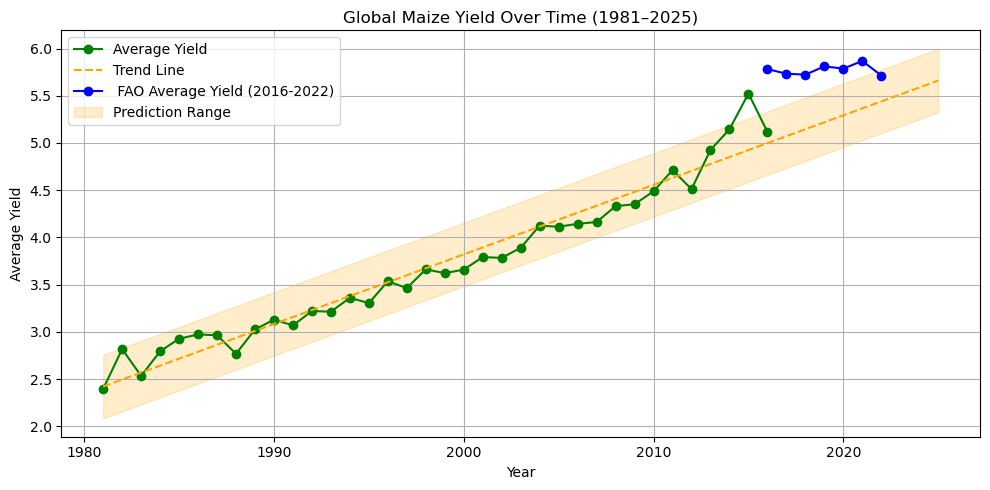


📈 Plotting average yield over years for WHEAT...
    Crop  Year  Area (ha)  Production (t)  Yield (t/ha)
0  Wheat  2016  218953770     748439274.4      3.418253
1  Wheat  2017  217185610     772591036.8      3.557285
2  Wheat  2018  212701512     732646116.5      3.444480
3  Wheat  2019  213501384     763271238.7      3.575018
4  Wheat  2020  217208936     760144478.9      3.499600
5  Wheat  2021  219887188     774642499.7      3.522909
6  Wheat  2022  219033837     811384426.4      3.704379


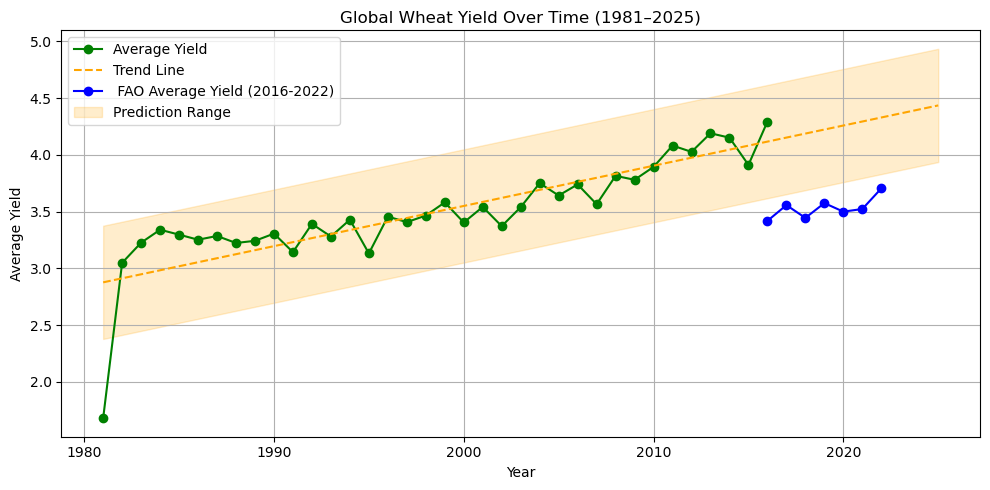


📈 Plotting average yield over years for SOYBEAN...
      Crop  Year  Area (ha)  Production (t)  Yield (t/ha)
0  Soybean  2016  122048068     335905761.7      2.752242
1  Soybean  2017  125905263     359515842.9      2.855447
2  Soybean  2018  124756334     345203256.4      2.767020
3  Soybean  2019  121826112     336194001.5      2.759622
4  Soybean  2020  127624186     355871646.6      2.788434
5  Soybean  2021  130646334     372706079.6      2.852786
6  Soybean  2022  134203467     353696966.4      2.635528


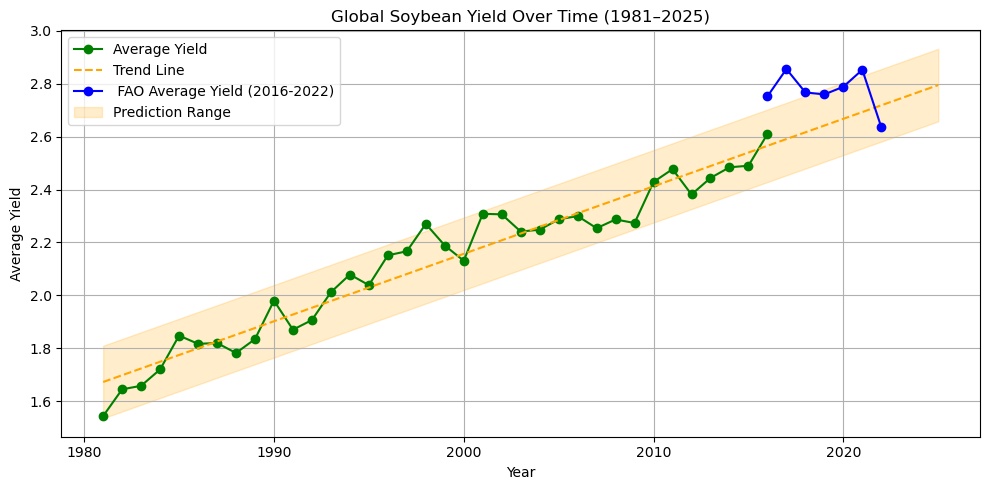

In [31]:
# Plotting average crop yield by year

from pyspark.sql.functions import avg
import numpy as np

spark = SparkSession.builder.appName("CropYieldAnalysis").getOrCreate()

# CROP GLOBAL YIELD DATA 2016 - 2022 EXTRACTED FROM FAOSTAT https://www.fao.org/faostat/en/#data/QCL/visualize
average_data_path = os.path.join(data_folder, "crop_yield_average.csv")
print(f"Full file path: {average_data_path}")
avg_df = spark.read.option("header", True).option("inferSchema", True).csv(average_data_path)

for crop, path in crop_files.items():
    print(f"\n📈 Plotting average yield over years for {crop.upper()}...")

    # Load data
    df = spark.read.option("header", True).option("inferSchema", True).csv(path)
    
    # Check required columns
    if not {"var", "year"}.issubset(set(df.columns)):
        print(f"⚠️ Skipping {crop} — missing required columns")
        continue

    # Group by year and calculate average yield
    avg_yield_by_year = df.groupBy("year").agg(avg("var").alias("avg_yield")).orderBy("year")

    # Convert to Pandas for plotting
    pandas_df = avg_yield_by_year.toPandas()
    
    # Sort by year just in case
    pandas_df = pandas_df.sort_values("year")
    
    # Prepare data for trend line
    x = pandas_df["year"]
    y = pandas_df["avg_yield"]
    
    # Linear regression using NumPy
    z = np.polyfit(x, y, 1)  # 1 = linear
    p = np.poly1d(z)

    #Create extended range up to 2025
    x_extended = np.arange(x.min(), 2026)  
    trendline = p(x_extended)
    #Standard error
    y_pred = p(x)
    residuals = y - y_pred
    std_error = np.std(residuals)
    

    # Calculate estimate upper and lower_bounds
    upper_bound = trendline + 2 * std_error
    lower_bound = trendline - 2 * std_error

    # Add average yield data from the CSV file (for 2016-2020)
    avg_crop_df = avg_df[avg_df["crop"] == crop.capitalize()]
    avg_crop_df = avg_crop_df.withColumn("Year", avg_crop_df["Year"].cast("int"))
    avg_yield_2017_2022 = avg_crop_df.filter(avg_crop_df["Year"].between(2016, 2022)).toPandas()
    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o', linestyle='-', label="Average Yield", color='green')
    plt.plot(x_extended, trendline, linestyle='--', label="Trend Line", color='orange')
    # Plot actual data found for 2016-2022
    plt.plot(avg_yield_2017_2022["Year"], avg_yield_2017_2022["Yield (t/ha)"], marker='o', linestyle='-', color='blue', label=f" FAO Average Yield (2016-2022)", zorder=5)
    # fill prediction range
    plt.fill_between(x_extended, lower_bound, upper_bound, color='orange', alpha=0.2, label="Prediction Range")
    plt.title(f"Global {crop.capitalize()} Yield Over Time (1981–2025)")
    plt.xlabel("Year")
    plt.ylabel("Average Yield")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

spark.stop()


📈 Analyzing RICE across continents...


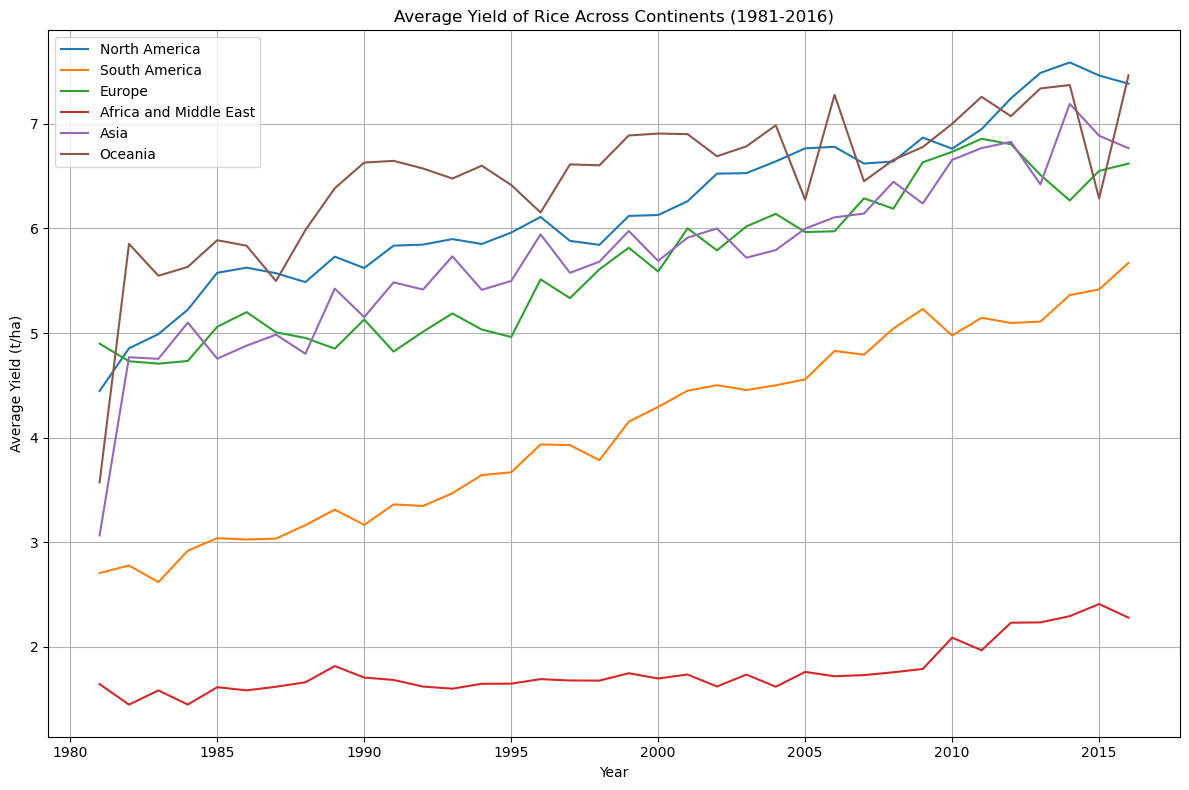


📈 Analyzing MAIZE across continents...


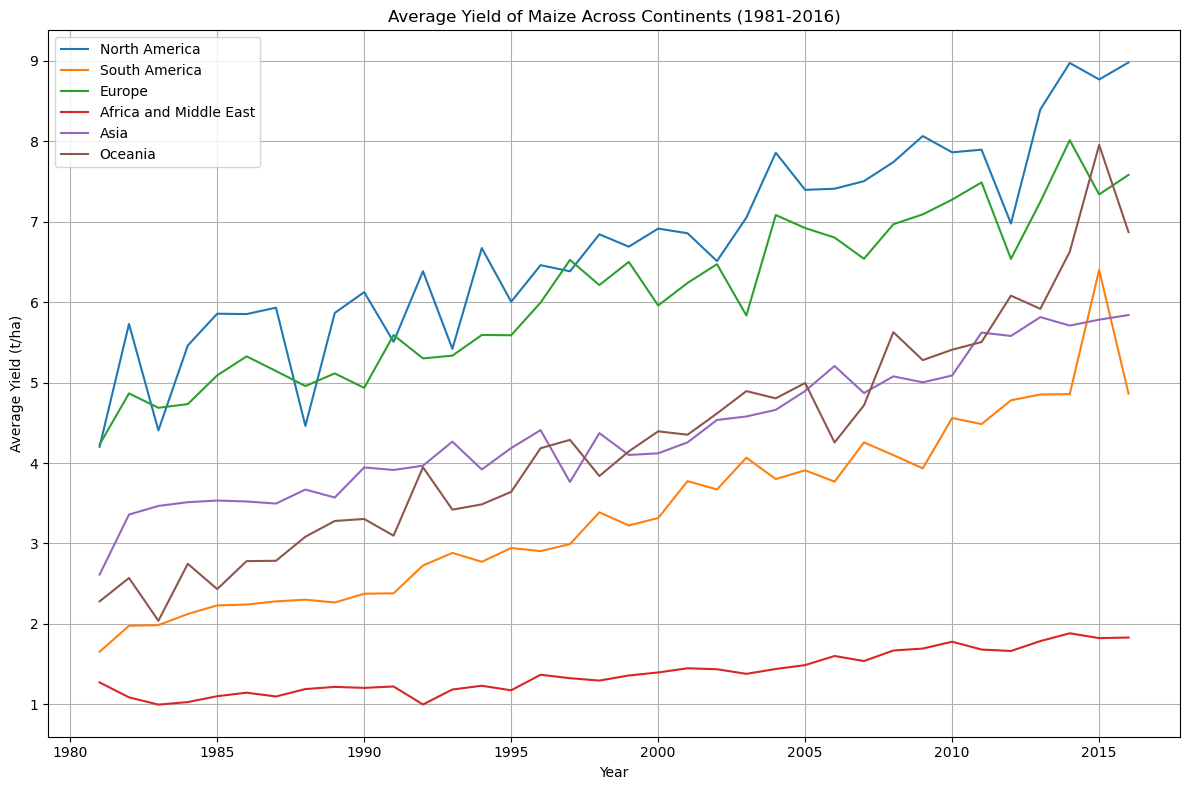


📈 Analyzing WHEAT across continents...


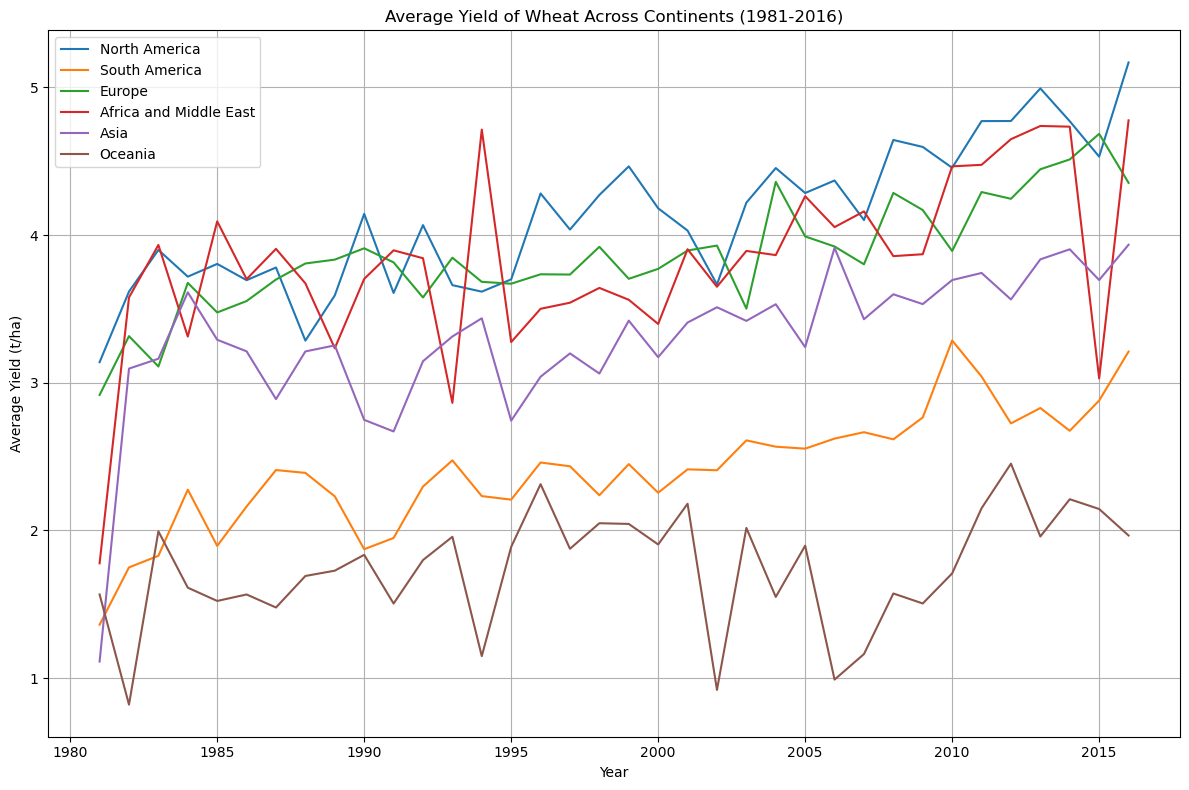


📈 Analyzing SOYBEAN across continents...


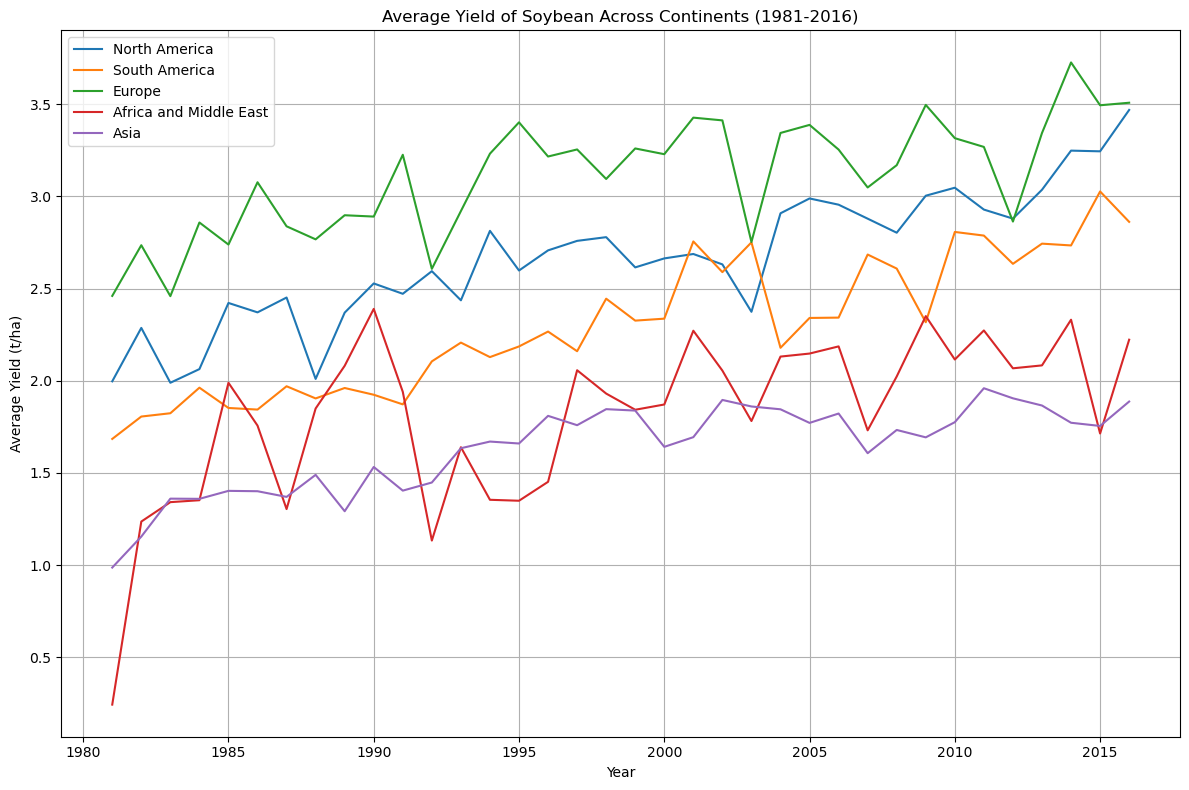

In [46]:
# Continent_bounds for continental analysis
continent_bounds = [
    {
        "continent": "North America",
        "lat_range": [17, 60],
        "lon_range": [192.0, 300.0]
    },
    {
        "continent": "South America",
        "lat_range": [-56.0, 17.0],
        "lon_range": [260.0, 330.0]
    },
    {
        "continent": "Europe",
        "lat_range": [36.0, 71.0],
        "lon_range": [330.0, 60.0]
    },
    {
        "continent": "Africa and Middle East",
        "lat_range": [-38.0, 37.0],
        "lon_range": [330.0, 60.0]
    },
    {
        "continent": "Asia",
        "lat_range": [6.0, 81.0],
        "lon_range": [60.0, 180.0]
    },
    {
        "continent": "Oceania",
        "lat_range": [-50.0, 6.0],
        "lon_range": [90.0, 180.0]
    }
]
def filter_by_continent(df, lat_col="lat", lon_col="lon", continent=""):
    bounds = next(item for item in continent_bounds if item["continent"] == continent)
    lat_range = bounds["lat_range"]
    lon_range = bounds["lon_range"]

    if lon_range[0] > lon_range[1]:
        # If the longitude range crosses over 360 (e.g., 330 to 60)
        lon_condition = (
            (col(lon_col) >= lon_range[0]) | 
            (col(lon_col) <= lon_range[1])
        )
    else:
        # Regular longitude condition (within 0-360)
        lon_condition = (
            (col(lon_col) >= lon_range[0]) & 
            (col(lon_col) <= lon_range[1])
        )

    return df.filter(
        (col(lat_col) >= lat_range[0]) & 
        (col(lat_col) <= lat_range[1]) &
        lon_condition
    )

spark = SparkSession.builder.appName("CropYieldContinentAnalysis").getOrCreate()
for crop, path in crop_files.items():
    print(f"\n📈 Analyzing {crop.upper()} across continents...")

    # Load the crop data
    df = spark.read.option("header", True).option("inferSchema", True).csv(path)

    # Check if the required columns exist
    if not {"var", "year", "lat", "lon"}.issubset(set(df.columns)):
        print(f"⚠️ Skipping {crop} — missing required columns")
        continue

    # Initialize a dictionary to store the average yield per continent and year
    continent_yields = {continent["continent"]: [] for continent in continent_bounds}

     def get_yield_percentage(early_df, late_df):
        # Sum of yield for early and late years
        early_total = early_df.select(F.sum("var")).collect()[0][0]
        late_total = late_df.select(F.sum("var")).collect()[0][0]

        # Calculate percentage of each continent in early and late periods
        early_percentage = early_df.withColumn("percentage", (col("var") / early_total) * 100)
        late_percentage = late_df.withColumn("percentage", (col("var") / late_total) * 100)
        
        return early_percentage, late_percentage

    early_years = [1981, 1982, 1983]
    late_years = [2014, 2015, 2016]
    # Group by year and calculate the average yield by continent
    for continent in continent_yields.keys():
        continent_df = filter_by_continent(df, continent=continent)

        # Group by year and calculate the average yield
        avg_yield_by_year = continent_df.groupBy("year").agg(avg("var").alias("avg_yield")).orderBy("year")

        # Convert to pandas DataFrame for easier manipulation and plotting
        pandas_df = avg_yield_by_year.toPandas()

        # Store the results
        continent_yields[continent] = pandas_df

    # Now let's visualize the yield distribution for each continent over time
    plt.figure(figsize=(12, 8))
    
    # Plot for each continent
    for continent, data in continent_yields.items():
        if len(data) > 0:  # Ensure there's data to plot
            plt.plot(data["year"], data["avg_yield"], label=f"{continent}")

    # Customizing the plot
    plt.title(f"Average Yield of {crop.capitalize()} Across Continents (1981-2016)")
    plt.xlabel("Year")
    plt.ylabel("Average Yield (t/ha)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

spark.stop()


📈 Analyzing RICE...

📈 Analyzing MAIZE...

📈 Analyzing WHEAT...

📈 Analyzing SOYBEAN...


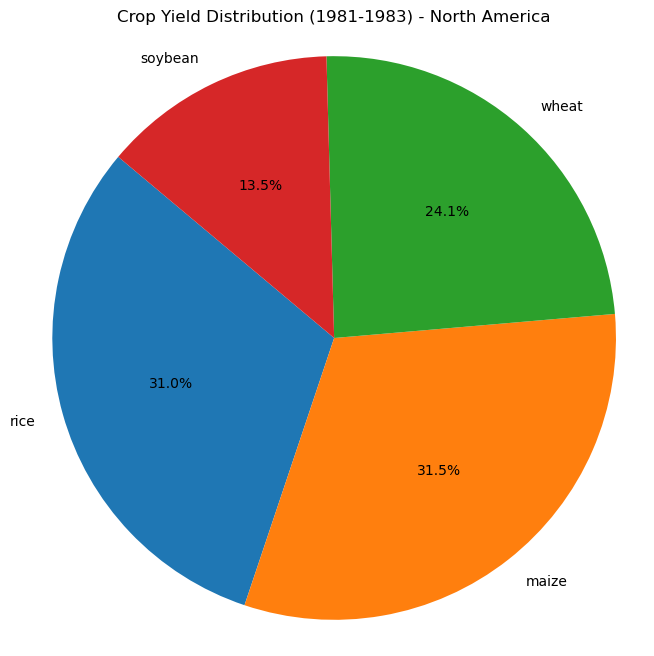

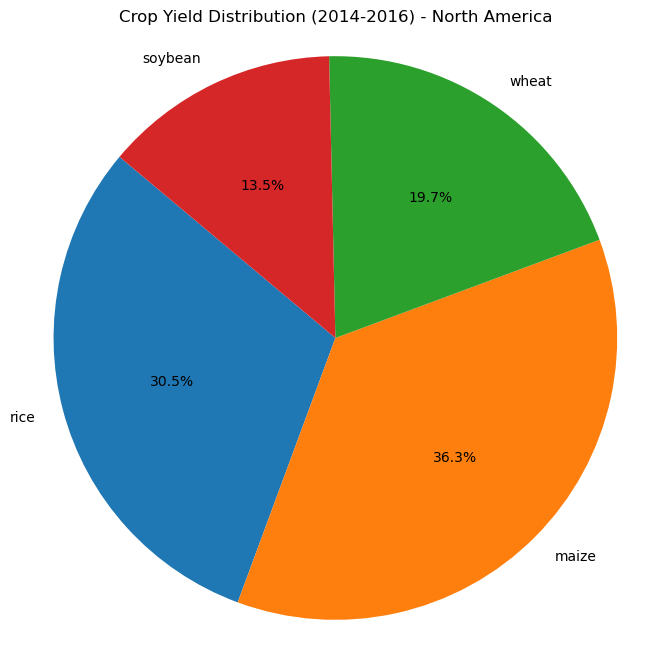

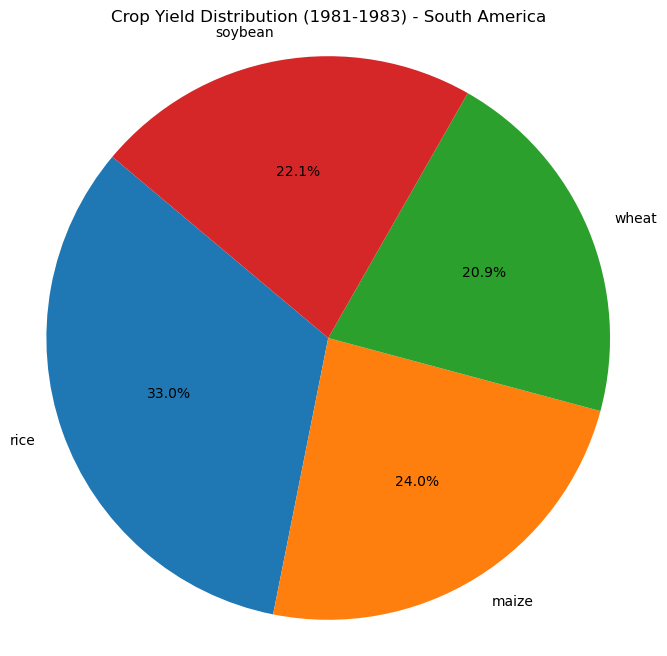

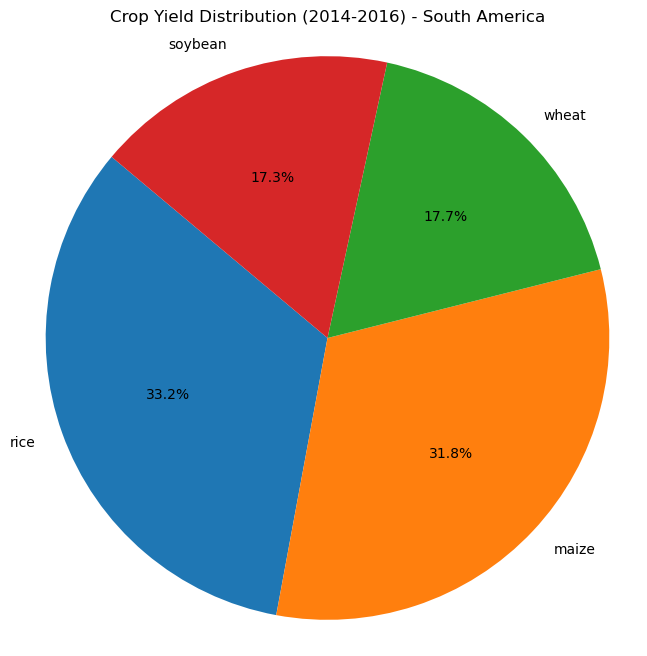

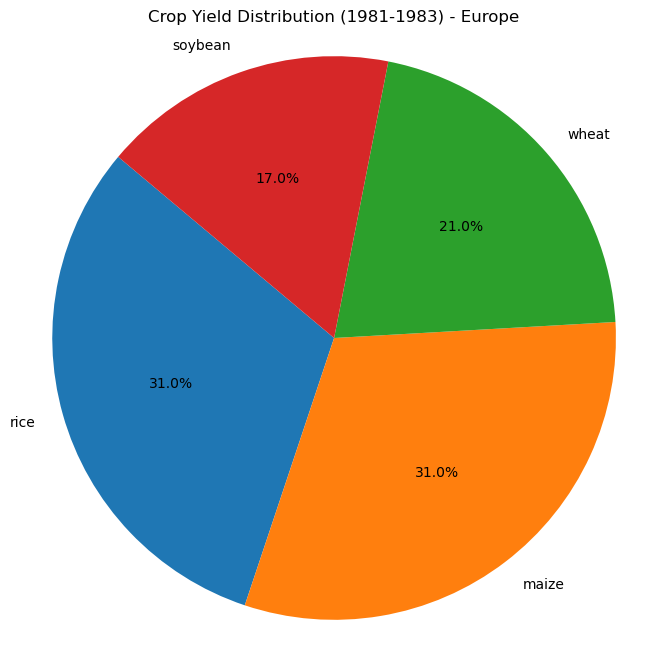

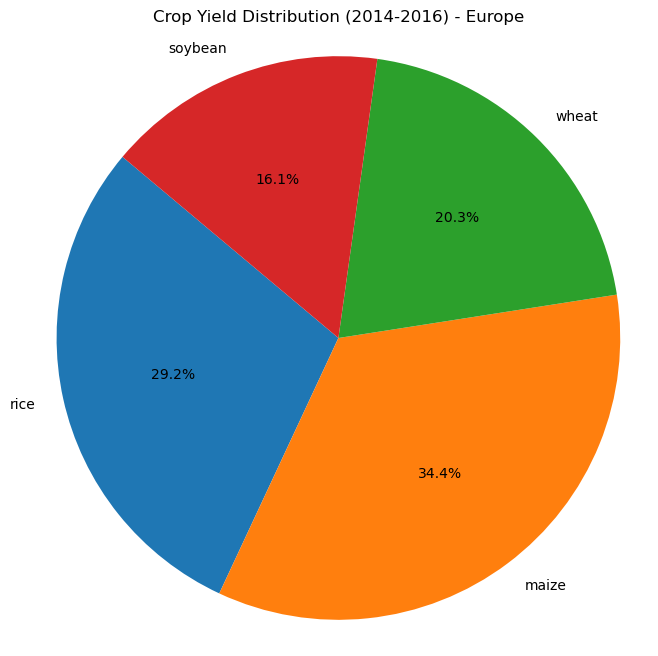

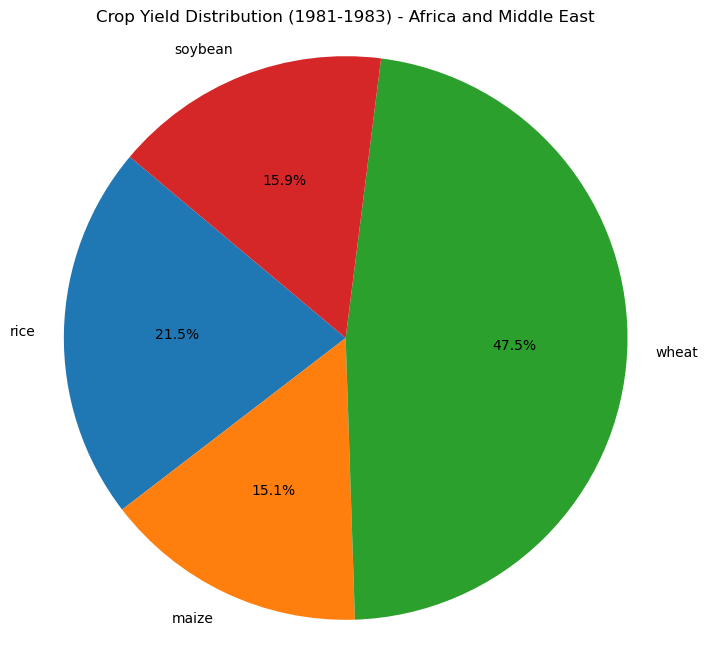

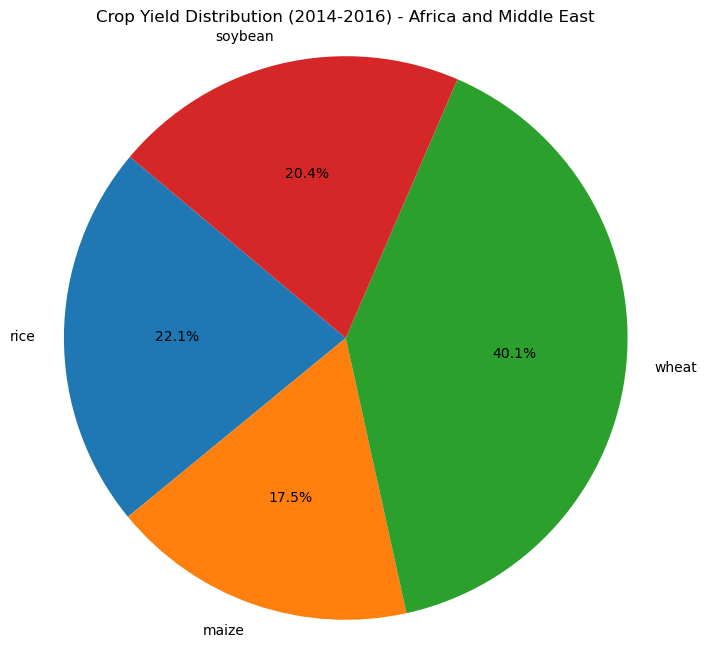

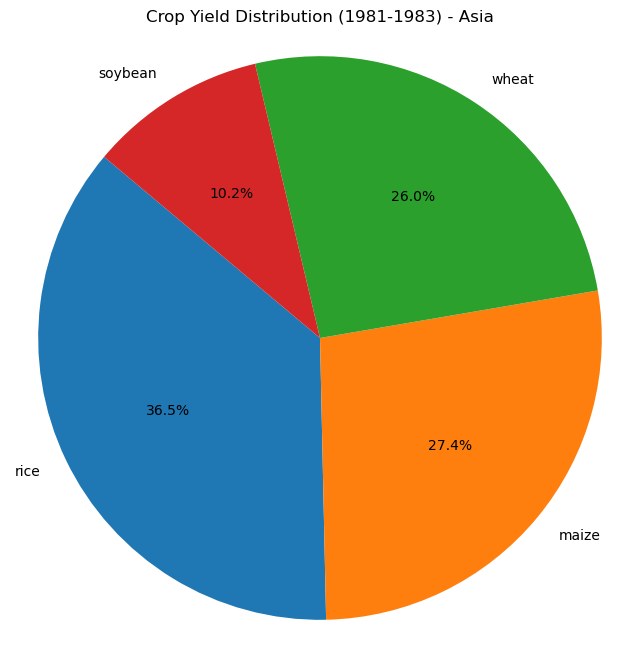

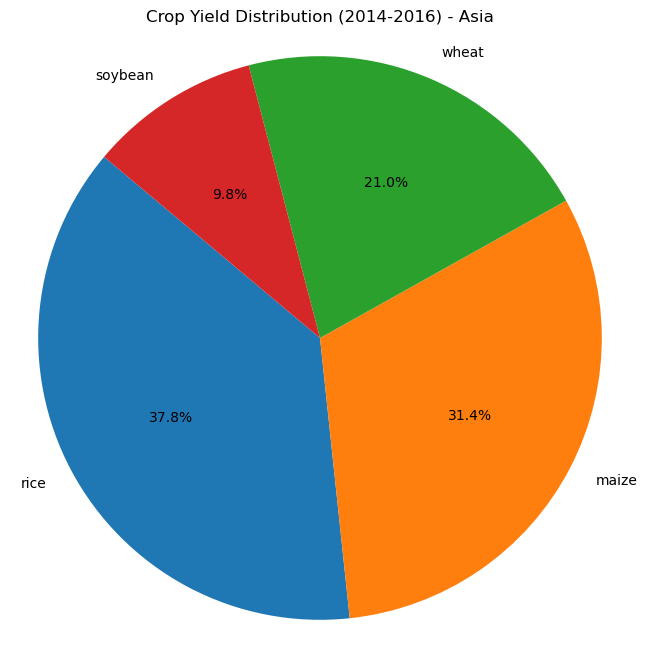

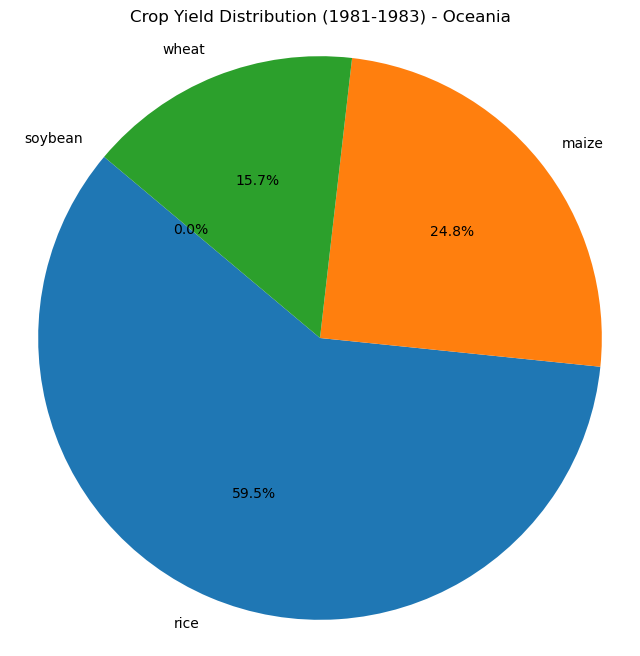

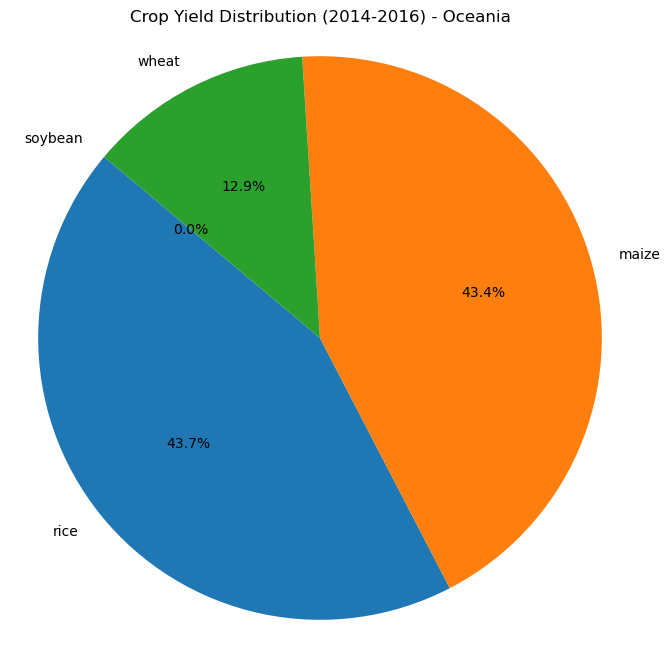

In [50]:
# Calculating Crop distribution of continents in years [1981-1984] and [2014-2016]
spark = SparkSession.builder.appName("CropYieldContinentChangeAnalysis").getOrCreate()
start_averages_by_continent = {crop: {continent["continent"]: 0 for continent in continent_bounds} for crop in crop_files}
end_averages_by_continent = {crop: {continent["continent"]: 0 for continent in continent_bounds} for crop in crop_files}

# Define years for start and end periods
early_years = [1981, 1982, 1983]
late_years = [2014, 2015, 2016]

for crop, path in crop_files.items():
    print(f"\n📈 Analyzing {crop.upper()}...")

    # Load the crop data
    df = spark.read.option("header", True).option("inferSchema", True).csv(path)

    # Check if the required columns exist
    if not {"var", "year", "lat", "lon"}.issubset(set(df.columns)):
        print(f"⚠️ Skipping {crop} — missing required columns")
        continue

    # For each continent, filter data and calculate averages
    for continent in start_averages_by_continent[crop].keys():
        continent_df = filter_by_continent(df, continent=continent)

        if continent_df.count() > 0:
            # Filter data for early and late years
            early_df = continent_df.filter(col("year").isin(early_years))
            late_df = continent_df.filter(col("year").isin(late_years))
    
            # Calculate average yield for early and late years
            early_avg_yield = early_df.agg(avg("var")).collect()[0][0]
            late_avg_yield = late_df.agg(avg("var")).collect()[0][0]
    
            # Store the averages for each crop by continent
            start_averages_by_continent[crop][continent] = early_avg_yield  if early_avg_yield is not None else 0
            end_averages_by_continent[crop][continent] = late_avg_yield if late_avg_yield is not None else 0
        else:
            # If no data, assign 0
            start_averages_by_continent[crop][continent] = 0
            end_averages_by_continent[crop][continent] = 0

# Calculate total average for all crops (for each period)
total_start_average = sum([sum(start_averages_by_continent[crop].values()) for crop in start_averages_by_continent])
total_end_average = sum([sum(end_averages_by_continent[crop].values()) for crop in end_averages_by_continent])

# Calculate the percentage of each crop per continent in both periods
start_percentages_by_continent = {}
end_percentages_by_continent = {}

# Calculate percentages for start and end averages
for crop in start_averages_by_continent:
    start_percentages_by_continent[crop] = {}
    end_percentages_by_continent[crop] = {}

    for continent in start_averages_by_continent[crop]:
        start_percentages_by_continent[crop][continent] = (start_averages_by_continent[crop][continent] / total_start_average) * 100
        end_percentages_by_continent[crop][continent] = (end_averages_by_continent[crop][continent] / total_end_average) * 100

# Pie chart visualization for the start (1981-1983) and end (2014-2016) periods for each continent

# Plot pie chart for start period (1981-1983) and end period (2014-2016)
for continent in continent_bounds:
    continent_name = continent["continent"]

    # Prepare data for pie chart
    start_data = [start_percentages_by_continent[crop].get(continent_name, 0) for crop in crop_files]
    end_data = [end_percentages_by_continent[crop].get(continent_name, 0) for crop in crop_files]

    # Pie chart for the start period
    plt.figure(figsize=(8, 8))
    plt.pie(start_data, labels=crop_files.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f"Crop Yield Distribution (1981-1983) - {continent_name}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    # Pie chart for the end period
    plt.figure(figsize=(8, 8))
    plt.pie(end_data, labels=crop_files.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f"Crop Yield Distribution (2014-2016) - {continent_name}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Stop the Spark session
spark.stop()

Processing: rice


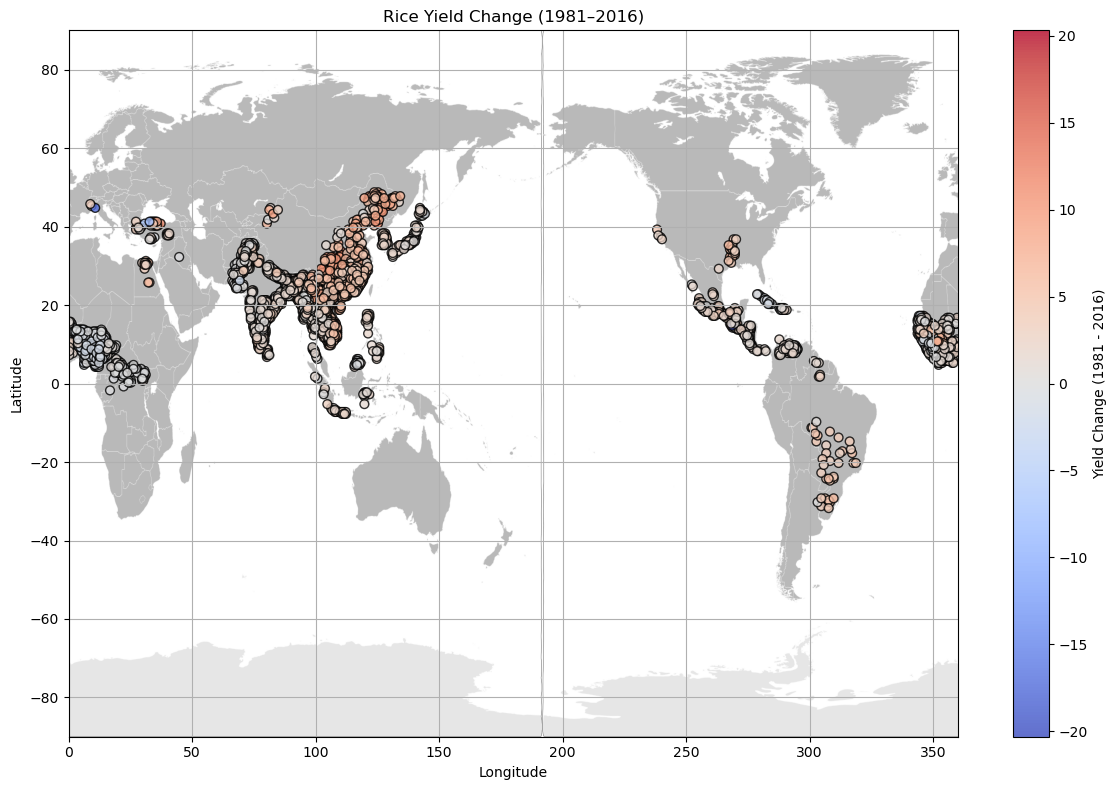

Processing: maize


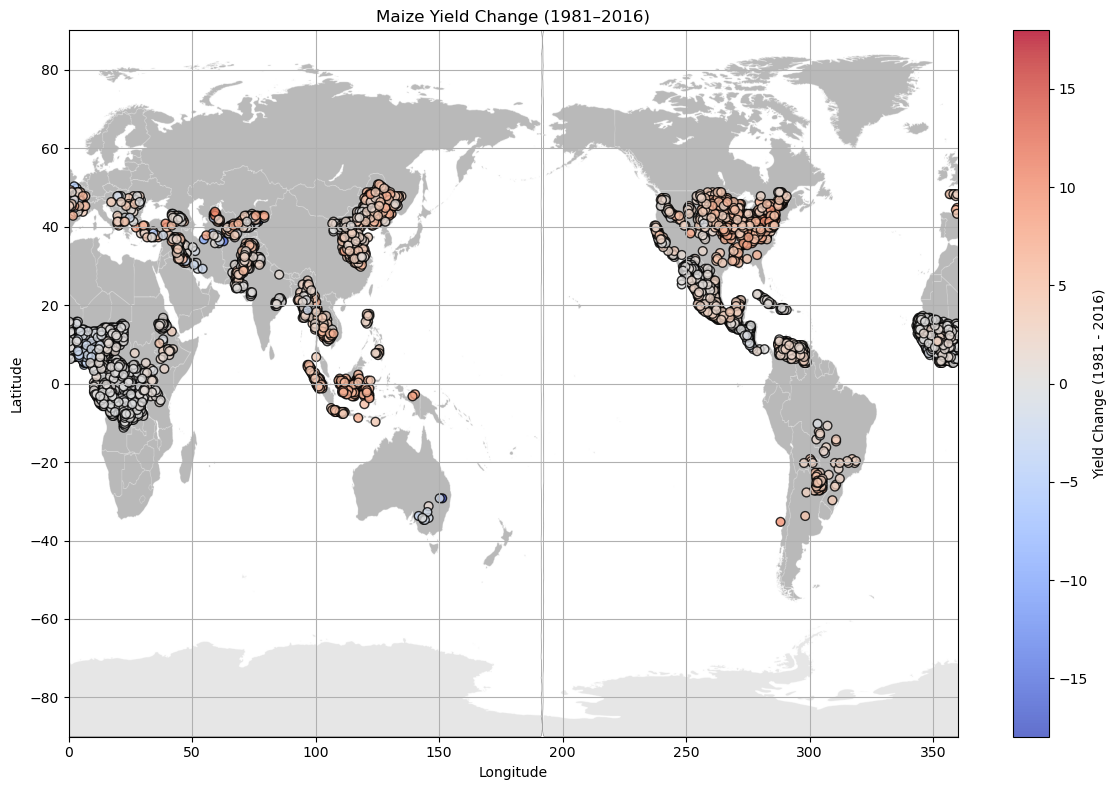

Processing: wheat


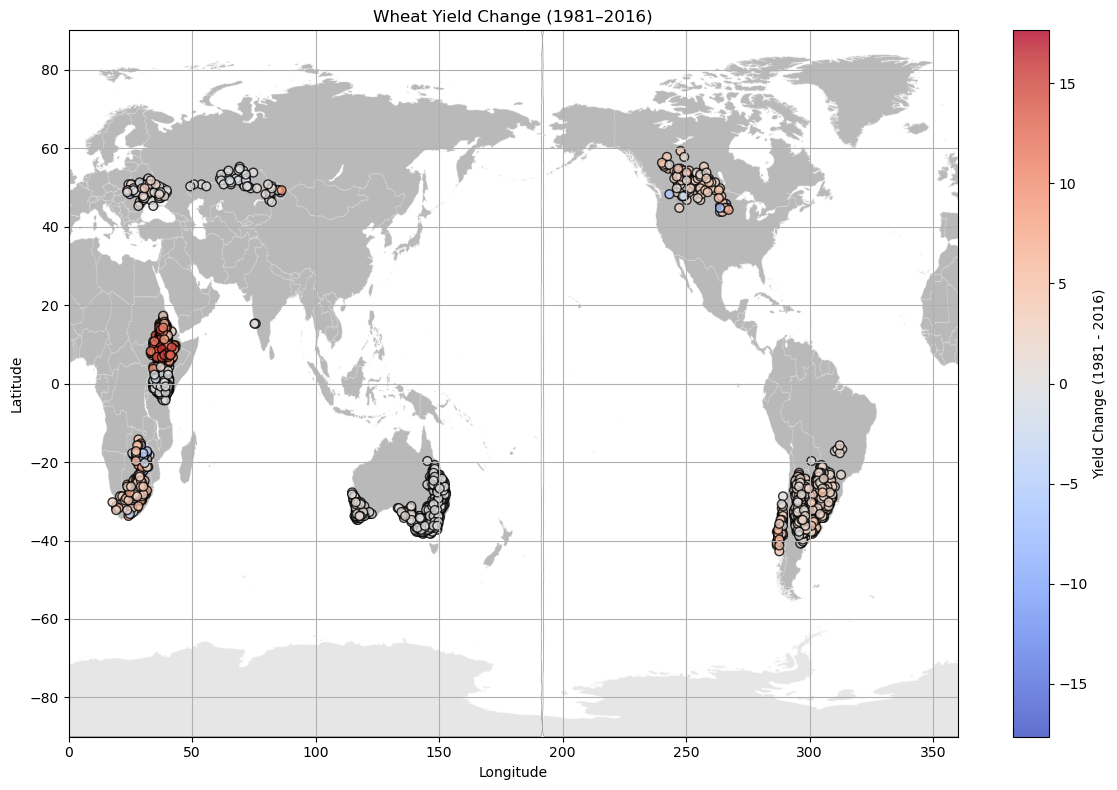

Processing: soybean


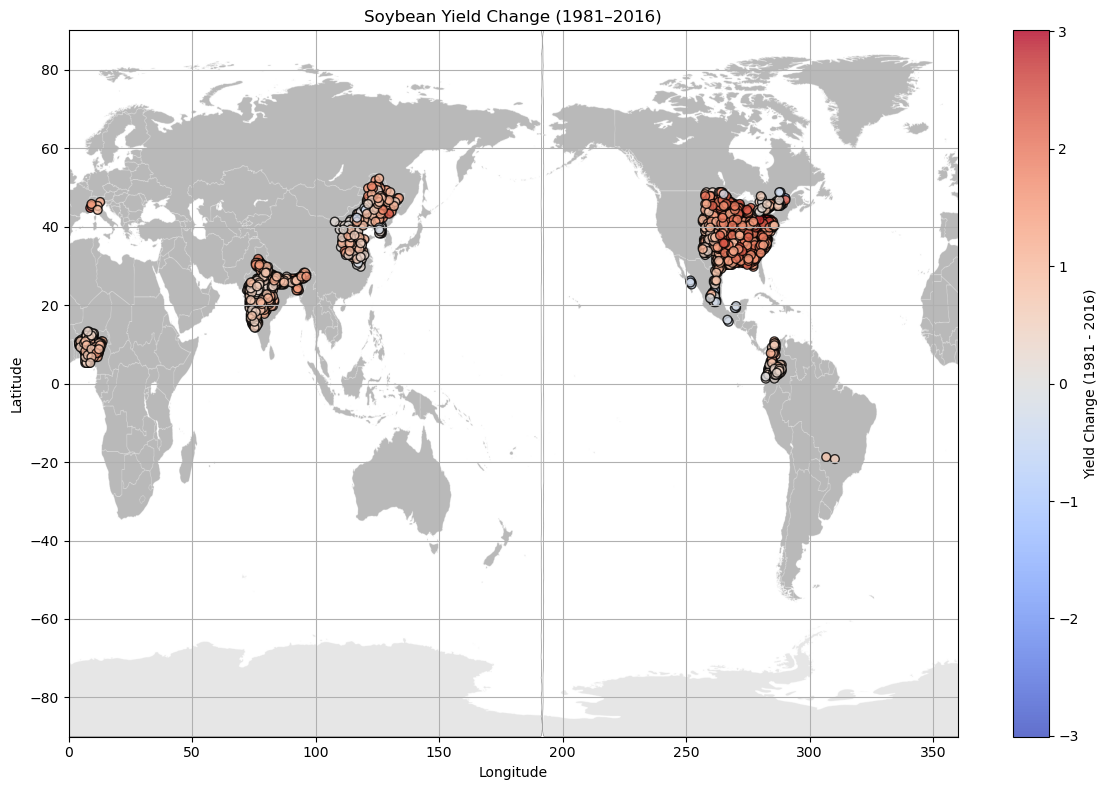

In [25]:
# Creating Global heatmap showing increases and decreases of yields in a map based way
spark = SparkSession.builder.appName("CropHeatmap").getOrCreate()

world_map_image = 'shifted_final.png'

# Load and label each crop file
for crop, path in crop_files.items():
    print(f"Processing: {crop}")
    
    # Load the crop data
    df = spark.read.csv(path, header=True, inferSchema=True)
    
    grouped = df.groupBy("lat", "lon", "year").agg(avg("var").alias("avg_yield"))

    yield_1981 = grouped.filter(col("year") == 1981).withColumnRenamed("avg_yield", "yield_1981").drop("year")
    yield_2016 = grouped.filter(col("year") == 2016).withColumnRenamed("avg_yield", "yield_2016").drop("year")

    delta = yield_1981.join(yield_2016, on=["lat", "lon"])

    delta = delta.withColumn("yield_change", col("yield_2016") - col("yield_1981"))

    pd_delta = delta.select("lat", "lon", "yield_change").toPandas()

    vmin = np.min(pd_delta["yield_change"])
    vmax = np.max(pd_delta["yield_change"])
    abs_max = max(abs(vmin), abs(vmax))  # Symmetric scale

    plt.figure(figsize=(12, 8))

    img = mpimg.imread(world_map_image)
    plt.imshow(img, extent=[0, 360, -90, 90], aspect='auto')
    
    scatter = plt.scatter(
        pd_delta["lon"],
        pd_delta["lat"],
        c=pd_delta["yield_change"],
        cmap="coolwarm",  # red = loss, blue = gain
        s=40,
        edgecolors="k",
        alpha=0.8,
        vmin=-abs_max,
        vmax=abs_max
    )
    plt.colorbar(scatter, label="Yield Change (1981 - 2016)")
    plt.title(f"{crop.title()} Yield Change (1981–2016)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'ScatterMap_{crop}.png', dpi=300)
    plt.show()
# Stop the Spark session
spark.stop()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Cross").getOrCreate()
!pip install --force-reinstall "pandas==2.1.4" "xarray==2023.12.0" "netCDF4" "scikit-learn" --quiet

# !wget -c https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_monthly/netcdf/chirps-v2.0.monthly.nc

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load datasets
precip_ds = xr.open_dataset("chirps-v2.0.monthly.nc")
precip = precip_ds['precip'].sel(time=slice('1981-01', '2016-12')).resample(time='A').sum()

yield_ds = xr.open_dataset("maize_major_1981.nc4")
yield_data = yield_ds['yield'].sel(time=slice('1981', '2016'))

# Interpolate precipitation to yield grid
precip_aligned = precip.interp(lat=yield_data.lat, lon=yield_data.lon)

# Create output map of regression coefficients
r2_map = np.full((yield_data.lat.size, yield_data.lon.size), np.nan)

# Loop through grid cells
for i in range(yield_data.lat.size):
    for j in range(yield_data.lon.size):
        y = yield_data[:, i, j].values
        X = precip_aligned[:, i, j].values
        mask = ~np.isnan(y) & ~np.isnan(X)
        if np.sum(mask) > 10:
            model = LinearRegression().fit(X[mask].reshape(-1, 1), y[mask])
            r2_map[i, j] = model.coef_[0]

# Plot heatmap
plt.figure(figsize=(12, 6))
plt.imshow(r2_map, cmap='coolwarm', origin='lower',
           extent=[yield_data.lon.min(), yield_data.lon.max(), yield_data.lat.min(), yield_data.lat.max()])
plt.title("Yield Sensitivity to Precipitation (Regression Coefficient)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Yield change per mm precipitation')
plt.tight_layout()
plt.show()

spark.stop()